## Lab 2

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt
import matplotlib.pyplot as plt

#### <b>pyt1.</b> wyjaśnij co oznacza, że wygenerowana wartość jest  losowa ? i o jaki parametr rozszerzyłbyś swoją funkcję? 

<b>def.</b> Zmienna losowa to funkcja $\sigma$ ciało podzbioru ${\rm I\!R}$ zawierające wszystjkie zbiory otwarte
Załużmy, że $(\Sigma, \Omega, P)$ jest przestrzenią probablistyczną. Zmienna losowa X to funkcjia $X:\Omega\rightarrow{\rm I\!R}$ spełniająca:
$${\forall}_{a \in {\rm I\!R}} X^{-1}(-\infty, a) \in \Sigma$$

Dla wektora losowego: 
$$X_1, X_2, ..., X_n:\Omega \rightarrow {\rm I\!R}$$
Czyli każda z osobna $X_1, ..., X_n$ są zmiennymi losowymi
W przypadku funkcji [generate_random_vector_n](./lab1.ipynb) oznacza to że każda zmienna jest określona za pomocą funkcji ciągłej(funkcja rand generuje zmienną z przedziału $(a, b)$ liczbe o rozkładzie prostokątnym). Funkcje natomiast rozszerzył bym o funkcje wyboru rozkładu z prostąkatny, gamma, wykładniczy oraz normalny oraz stan początkowy generatora umożliwiajacy powtorzenie losowania wektora. Ponadto możliwośc wprowadzenia swojej funkcji generującej zmienną losową co umożliwiło by np. na generowanie zmiennej losowej z dyskretnego przedziału z dowolnym rozkładem

#### <b>pyt2.</b> Jak zweryfikował(a) byś stwierdzenie, że otrzymane dane to zmienne losowe o zadanym rozkładzie ? 

by zweryfikowac dane o danym rozkładzie wygenerował bym $m$ razy $ n + k$ wektorów losowych np. 10, 100, kolejno 1000 itd. 
1) Za każdym razem po wygenerowaniu próbki rysował bym histogram. Tak długo aż większa ilość próbek nie zmieni rozkładu
</br>
2) Obliczeni pierwiastka z wariancji dla każdej wygenerowanej próby do momentu kiedy jej wartośc będzie zbieżna tzn. jesl wektor ma n wymiarów 
$X_1, ..., X_2$ to dla wylosowanych m wektorów liczymy wariancję dla każdej kolumny powestałej macierzy

#### Korzystając z pythona lub R wygeneruj zbiór 100 losowych zmiennych o rozkładzie normalnym N(4,2) i zweryfikuj te dane przynajmniej jednym testem statystycznym. 

In [2]:
# Wygenerowanie próbki 100 zmiennych losowych o rozkładzie normalnym
alpha = 0.01
m, sigma = 4, 2
s = np.random.normal(m, sigma, 100)


#### Test za pomocą wariancji

In [3]:
standard_deviation = abs(sigma - np.std(s))
standard_deviation

0.1314423965575937

In [4]:
print(f'Czy hipoteza jest prawdziwa?: {"Tak" if standard_deviation < alpha else "nie"}')

Czy hipoteza jest prawdziwa?: nie


Jak widać przy próbce 100 zmiennych losowych nie jest wystarczająca by przybliżyć wystarczająco rozklad normalny

#### Histogram z wygenerowanej próbki danych, powinien przypominać rozkład normalny

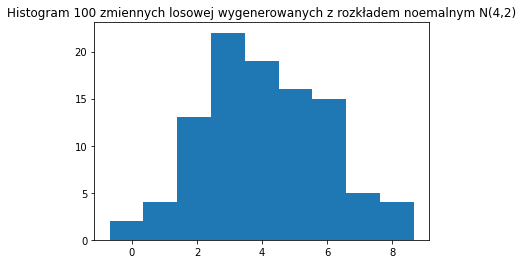

In [5]:
a = np.hstack(s)
_ = plt.hist(a, bins='auto')
plt.title("Histogram 100 zmiennych losowej wygenerowanych z rozkładem noemalnym N(4,2)")
plt.show()

In [6]:
m, sigma = 4, 2
s = np.random.normal(m, sigma, 1000)
standard_deviation = abs(sigma - np.std(s))
print(standard_deviation)
print(f'Czy hipoteza jest prawdziwa?: {"Tak" if standard_deviation < alpha else "nie"}')

0.02639141064916606
Czy hipoteza jest prawdziwa?: nie


### <b>Dodatkowe przykłady przy większej liczbie próbek</b>

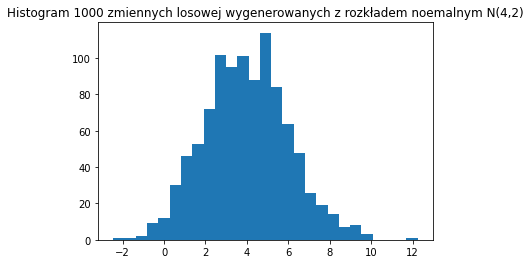

In [7]:
a = np.hstack(s)
_ = plt.hist(a, bins='auto')
plt.title("Histogram 1000 zmiennych losowej wygenerowanych z rozkładem noemalnym N(4,2)")
plt.show()

In [8]:
m, sigma = 4, 2
s = np.random.normal(m, sigma, 10000)
standard_deviation = abs(sigma - np.std(s))
print(standard_deviation)
print(f'Czy hipoteza jest prawdziwa?: {"Tak" if standard_deviation < alpha else "nie"}')

0.0036917259932898183
Czy hipoteza jest prawdziwa?: Tak


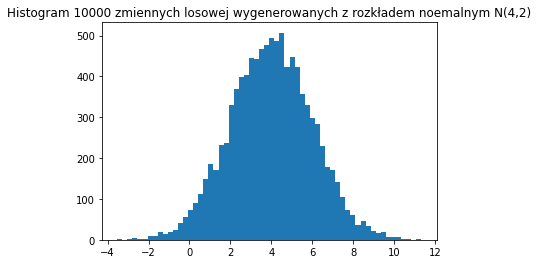

In [9]:
a = np.hstack(s)
_ = plt.hist(a, bins='auto')
plt.title("Histogram 10000 zmiennych losowej wygenerowanych z rozkładem noemalnym N(4,2)")
plt.show()

In [ ]:
m, sigma = 4, 2
s = np.random.normal(m, sigma, 10000)
standard_deviation = abs(sigma - np.std(s))
print(standard_deviation)
print(f'Czy hipoteza jest prawdziwa?: {"Tak" if standard_deviation < alpha else "nie"}')

#### <b>pyt3</b>. Po co weryfikować z jakiego rozkładu otrzymywane są dane skoro tworzymy je z góry ustalonej funkcji ? 

Sprawdzamy by sprawdzić czy wygenerowana ilość próbek jest wystarczająca by reprezentować dany rozkład